# Лабораторная работа 5.  Эвристические алгоритмы

**Цель работы:** ознакомление с  эвристическими алгоритмами  и методикой оценки  их эффективности.

**Барышев Михаил, Вариант - 5**



## Задание 1.

Дан либиринт. Вход в лабиринт находится сверху слева, выход - снизу справа.  

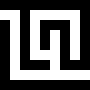


а) Используя волновой алгоритм вручную построить оптимальный путь через лабиринт.

б) Используя маршрутный алгоритм вручную построить оптимальный путь через лабиринт.



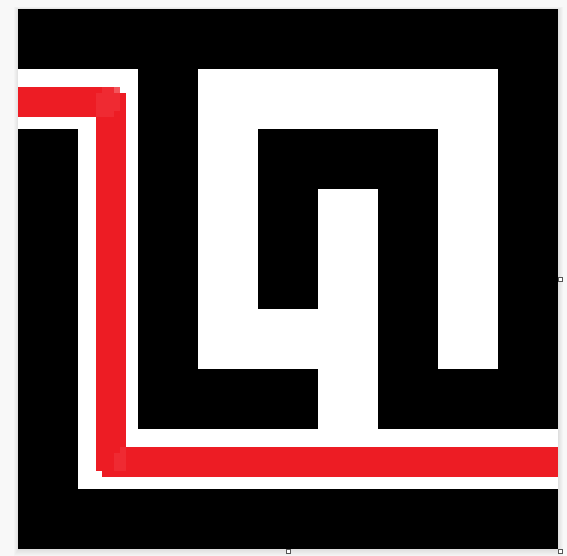

In [7]:
## Wave_algorithm

maze = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1], #1
    [0, 0, 1, 0, 0, 0, 0, 0, 1], #2
    [1, 0, 1, 0, 1, 1, 1, 0, 1], #3
    [1, 0, 1, 0, 1, 0, 1, 0, 1], #4
    [1, 0, 1, 0, 1, 0, 1, 0, 1], #5
    [1, 0, 1, 0, 0, 0, 1, 0, 1], #6
    [1, 0, 1, 1, 1, 0, 1, 1, 1], #7
    [1, 0, 0, 0, 0, 0, 0, 0, 0], #8
    [1, 1, 1, 1, 1, 1, 1, 1, 1], #9
]

start = (1, 0)
end = (7, 8)

### Creating wave-map
wave = [[-1 for j in range(len(maze[0]))] for i in range(len(maze))]
wave[start[0]][start[1]] = 0

queue = [start]

while queue:
    x, y = queue.pop(0)
    for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
        nx, ny = x + dx, y + dy
        if 0 <= nx < len(maze) and 0 <= ny < len(maze[0]) and wave[nx][ny] == -1 and maze[nx][ny] == 0:
            wave[nx][ny] = wave[x][y] + 1
            queue.append((nx, ny))

### Creating a path
path = [end]
x, y = end
while wave[x][y] != 0:
    for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
        nx, ny = x + dx, y + dy
        if 0 <= nx < len(maze) and 0 <= ny < len(maze[0]) and wave[nx][ny] == wave[x][y] - 1:
            x, y = nx, ny
            path.append((x, y))
            break

path.reverse()

if path is None:
    print("Error in path")
else:
    print("Optimal path:", path)

Optimal path: [(1, 0), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8)]


In [8]:
## Route algorithm

from queue import Queue

maze = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1], #1
    [0, 0, 1, 0, 0, 0, 0, 0, 1], #2
    [1, 0, 1, 0, 1, 1, 1, 0, 1], #3
    [1, 0, 1, 0, 1, 0, 1, 0, 1], #4
    [1, 0, 1, 0, 1, 0, 1, 0, 1], #5
    [1, 0, 1, 0, 0, 0, 1, 0, 1], #6
    [1, 0, 1, 1, 1, 0, 1, 1, 1], #7
    [1, 0, 0, 0, 0, 0, 0, 0, 0], #8
    [1, 1, 1, 1, 1, 1, 1, 1, 1], #9
]

def find_path(maze):
    start = (1, 0)
    end = (7, 8)
    q = Queue()
    q.put(start)
    visited = set()
    prev = {}
    while not q.empty():
        curr = q.get()
        if curr == end:
            break
        neighbors = [(curr[0]-1, curr[1]), (curr[0]+1, curr[1]), (curr[0], curr[1]-1), (curr[0], curr[1]+1)]
        for neighbor in neighbors:
            if neighbor[0] < 0 or neighbor[0] >= len(maze) or neighbor[1] < 0 or neighbor[1] >= len(maze[0]):
                continue
            if maze[neighbor[0]][neighbor[1]] == 1:
                continue
            if neighbor in visited:
                continue
            visited.add(neighbor)
            q.put(neighbor)
            prev[neighbor] = curr
    if end not in prev:
        return None
    path = []
    curr = end
    while curr != start:
        path.append(curr)
        curr = prev[curr]
    path.append(start)
    path.reverse()
    return path

path = find_path(maze)

if path is None:
    print("Error in path")
else:
    print("Optimal path:", path)


Optimal path: [(1, 0), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8)]


## Задание 2.

Дан либиринт. Вход в лабиринт находится сверху слева, выход - снизу справа. 
Реализовав алгоритм в соответствии с заданием построить оптимальный путь через лабиринт.

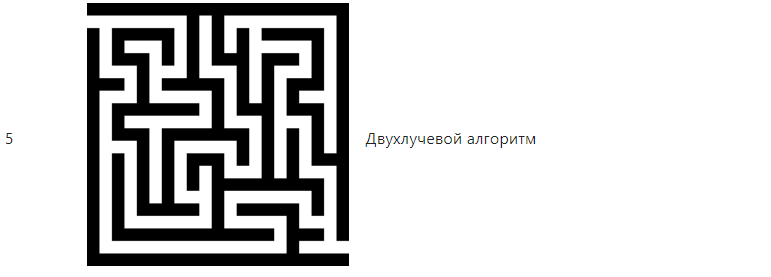


Евклидово расстояние: $d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2 }$ (Двигаться можно по ветрикали, горизонтали и диагонали)

Манхэттенское расстояние:  $d = |x_2 - x_1| + |y_2 - y_1| $ (Двигаться можно только по горизонтали и вертикали)





In [33]:
import pandas as pd
import copy
from collections import deque
from math import inf

# given data
LABIRINTH = [
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], #0
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], #1
       [1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1], #2
       [1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1], #3
       [1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1], #4
       [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1], #5
       [1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1], #6
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1], #7
       [1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1], #8
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1], #9
       [1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1], #10
       [1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1], #11
       [1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1], #12
       [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1], #13
       [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1], #14
       [1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1], #15
       [1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1], #16
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1], #17
       [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1], #18
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], #19
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], #20

]

START = (1, 0)
END = (19, 20)

# CONST list for finding 4 neighbours of point aka VonNeuman...
DELTA = [(-1, 0), (1, 0), (0, 1), (0, -1)] 


ALPHA_VISITED = 'alpha'
BETA_VISITED = 'beta'

# Solving path with knowing of 2 ends
def solve_path(path, end_a, end_b):
    result = []
    cur_a = end_a
    cur_b = end_b
    while cur_a is not None:
        result.append(cur_a)
        cur_a = path[cur_a[0]][cur_a[1]]
    while cur_b is not None:
        result.append(cur_b)
        cur_b = path[cur_b[0]][cur_b[1]]
    return result

def print_lab(lab):
    for i in range(len(lab)):
        for j in range(len(lab)):
            if lab[i][j] == inf:
                lab[i][j] = 0
    for row in lab:
        print(row)

# Optional for printing path in labirinh
def print_path_labirinth(labirinth, path):
    result = copy.deepcopy(labirinth)
    for y, x in path:
        result[y][x] = '+'
    print(pd.DataFrame(result).to_string())
    

# main func aka wave func to solve labirinth
def solveLabrinth(labrinth, start, end, print_path=False):
    n = len(labrinth)
    m = len(labrinth[0])
    distances = [[inf] * m for _ in range(n)]
    visited_points = [[ None ] * m for _ in range(n)]
    paths = [[None] * m for _ in range(n)]
    queue_alpha, queue_beta = deque(), deque()

    distances[start[0]][start[1]] = 0
    distances[end[0]][end[1]] = 1

    visited_points[start[1]][start[0]] = ALPHA_VISITED
    visited_points[end[0]][end[1]] = BETA_VISITED

    queue_alpha.append(start)
    queue_beta.append(end)

    while True:
        y_a, x_a = queue_alpha.popleft()
        y_b, x_b = queue_beta.popleft()

        for dy, dx in DELTA:
            ny_a, nx_a = y_a + dy, x_a + dx
            if 0 < nx_a < m and 0 < ny_a < n and labrinth[ny_a][nx_a] != 1:

                if visited_points[ny_a][nx_a] == BETA_VISITED:
                    if print_path:
                       print_path_labirinth(labrinth, solve_path(paths, end_a=(y_a, x_a), end_b=(ny_a, nx_a)))
                    return distances[y_a][x_a] +  distances[ny_a][nx_a]
                if visited_points[ny_a][nx_a] is None:
                    distances[ny_a][nx_a] = distances[y_a][x_a] + 1
                    queue_alpha.append((ny_a, nx_a))
                    visited_points[ny_a][nx_a] = ALPHA_VISITED
                    paths[ny_a][nx_a] = (y_a, x_a)
        
        for dy, dx in DELTA:
            ny_b, nx_b = y_b + dy, x_b + dx
            if 0 < nx_b < m and 0 < ny_b < n and labrinth[ny_b][nx_b] != 1:

                if visited_points[ny_b][nx_b] == ALPHA_VISITED:
                    if print_path:
                        print_path_labirinth(labrinth, solve_path(paths, end_a=(ny_b, nx_b), end_b=(y_b, x_b)))
                    return distances[y_b][x_b] +  distances[ny_b][nx_b]
                
                if visited_points[ny_b][nx_b] is None:
                    distances[ny_b][nx_b] = distances[y_b][x_b] + 1
                    queue_beta.append((ny_b, nx_b))
                    visited_points[ny_b][nx_b] = BETA_VISITED
                    paths[ny_b][nx_b] = (y_b, x_b)

# result
print(f'distance = {solveLabrinth(LABIRINTH, START, END, print_path=True)}')

   0  1  2  3  4  5  6  7  8  9  10 11 12 13 14 15 16 17 18 19 20
0   1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
1   +  +  0  0  0  0  0  0  1  0  1  0  0  0  0  0  0  0  0  0  1
2   1  +  1  1  1  1  1  0  1  0  1  0  1  0  1  1  1  1  1  0  1
3   1  +  1  0  0  0  1  0  1  0  1  0  1  0  0  0  0  0  1  0  1
4   1  +  1  1  1  0  1  0  1  0  1  1  1  0  1  1  1  0  1  0  1
5   1  +  +  +  1  0  0  0  1  0  0  0  1  0  1  0  0  0  1  0  1
6   1  1  1  +  1  0  1  1  1  1  1  0  1  0  1  0  1  1  1  0  1
7   1  +  +  +  1  0  0  0  0  0  1  0  1  0  1  0  1  0  0  0  1
8   1  +  1  1  1  1  1  1  1  0  1  0  1  1  1  0  1  1  1  0  1
9   1  +  1  0  0  0  0  0  0  0  1  0  0  0  1  0  0  0  1  0  1
10  1  +  1  1  1  0  1  1  1  1  1  1  1  0  1  0  1  0  1  0  1
11  1  +  0  0  1  0  1  0  0  0  0  0  1  0  1  0  1  0  1  0  1
12  1  +  1  0  1  0  1  0  1  1  1  0  1  0  1  0  1  0  1  1  1
13  1  +  1  0  1  0  1  0  1  0  1  0  0  0  1  0  1  0  0  0  1
14  1  +  

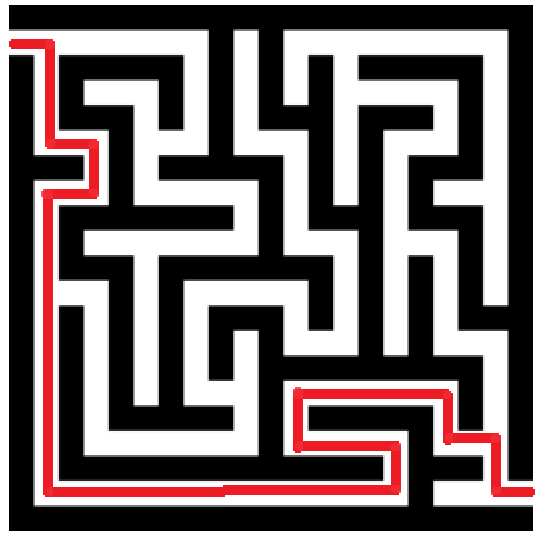

## Литература

Дональд Э. Кнут. Искусство программирования, том 2. Получисленные алгоритмы = The Art of Computer Programming, vol.2. Seminumerical Algorithms, 3-ed. — Вильямс, 2007. — С. 832. — ISBN 978-5-8459-0081-4.

Роберт Седжвик. Фундаментальные алгоритмы на C. Анализ/Структуры данных/Сортировка/Поиск = Algorithms in C. Fundamentals/Data Structures/Sorting/Searching. — СПб.: ДиаСофтЮП, 2003. — С. 672. — ISBN 5-93772-081-4.